<div align="left">
<img src="https://uploads-ssl.webflow.com/5f4d2915aacbff8a3255cf1b/60b68f6a34b2e95700900f3b_coderhouse-logo.svg" height=50>
</div>

**Data Science III: Comisión 77865**


# **Entrega Final**

La Entrega Final constará de dos partes. Un mínimo requerido respecto a NLP que estará cubierto por la primera actividad hacia la Entrega Final. Deberás entregar un dataset del estilo texto (libro, paper, documento, colección de tweets, etc) donde se desarrollen de mínima dos de las tareas más usuales de preprocesamiento de NLP.

También un mínimo requerido de Deep Learning donde puedas construir tu primera red neuronal sencilla, lo que cubrirá la segunda actividad hacia la Entrega Final.

Para la Entrega Final deberás elegir una de las dos actividades y profundizar en el mismo, ya sea realizando un análisis de texto sobre la actividad de NLP o mejorando la red, vía adición de capas, en el de Deep Learning.

# ✍️**Proyecto NLP**

### **Objetivo General**

Desarrollar un modelo de análisis de sentimientos capaz de clasificar automáticamente reseñas de usuarios de la app Instagram en categorías como negativas, neutras o positivas, a partir del contenido textual publicado en la App Store.

### **Hipótesis**
Las reseñas con puntuaciones bajas (1 o 2 estrellas) contienen un mayor número de palabras con connotaciones negativas y expresiones de frustración, lo que permite diferenciarlas significativamente de las reseñas con puntuaciones altas (4 o 5 estrellas), facilitando su clasificación automática mediante técnicas de NLP.



### **Preguntas de Investigación**

1. ¿Qué características textuales diferencian las reseñas con puntuaciones negativas de las positivas en cuanto a longitud, vocabulario o uso de palabras clave?

2. ¿Es posible predecir el sentimiento de una reseña (positivo, neutro, negativo) utilizando exclusivamente el texto, sin considerar la puntuación explícita del usuario?

## 1. **Recolección de los datos**

In [ ]:
# Crea un directorio para la configuración de Kaggle
!mkdir -p ~/.kaggle

# Mueve el archivo kaggle.json al directorio creado
!cp kaggle.json ~/.kaggle/

# Asigna los permisos correctos al archivo (lectura y escritura solo para ti)
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Descarga el dataset utilizando el comando de la API
!kaggle datasets download -d kanchana1990/instagram-ratings-and-reviews-appstore

Dataset URL: https://www.kaggle.com/datasets/kanchana1990/instagram-ratings-and-reviews-appstore
License(s): ODC Attribution License (ODC-By)
  0% 0.00/76.9k [00:00<?, ?B/s]
100% 76.9k/76.9k [00:00<00:00, 158MB/s]


In [ ]:
# Descomprime el archivo descargado
!unzip instagram-ratings-and-reviews-appstore.zip

Archive:  instagram-ratings-and-reviews-appstore.zip
  inflating: appstore_instagram_reviews_anonymized.csv  


In [ ]:
import pandas as pd

# Carga el archivo CSV en un DataFrame
Reviews = pd.read_csv('appstore_instagram_reviews_anonymized.csv')

# Muestra las primeras 5 filas para verificar
Reviews.head()

,appId,country,date,id,score,text,title,url,userName,userUrl,version
0,389801252,DE,2024-03-20T22:37:03-07:00,11067766035,1,"When I want to share any stories, posts or ree...",List of friends in weird order,https://itunes.apple.com/de/review?id=38980125...,988858b9f96ee718616ad5dc2496ff911ff86bd790caad...,https://itunes.apple.com/de/reviews/id159880897,323.0.0
1,389801252,DE,2024-03-20T22:17:05-07:00,11067726970,4,I have been using the app for a week now. I ca...,Great companion,https://itunes.apple.com/de/review?id=38980125...,06dfad50909f5bc85a0a4198d91da9e5d5ae9954e8bba6...,https://itunes.apple.com/de/reviews/id1333052389,323.0.0
2,389801252,DE,2024-03-20T16:08:40-07:00,11066866484,1,"Instagram, was ist nur mit euch los? Es ist fr...",#Instagram #Fehler #Verbesserung dringend nötig,https://itunes.apple.com/de/review?id=38980125...,4b8d13b92ce712f53651cb538b1c079daa782136547a20...,https://itunes.apple.com/de/reviews/id711608090,323.0.0
3,389801252,DE,2024-03-20T15:54:39-07:00,11066832683,1,Die neue Schriftart ist so unglaublich hässlich.,Hässliche Layout,https://itunes.apple.com/de/review?id=38980125...,52acf5c35b9fa5653f8fb7b9ab7ec305e0ead4f07708bc...,https://itunes.apple.com/de/reviews/id830638504,323.0.0
4,389801252,DE,2024-03-20T14:59:23-07:00,11066699753,1,Null zufrieden darum gelöscht,Instagram absoluter Müll geworden sorry aber e...,https://itunes.apple.com/de/review?id=38980125...,f31334bd164a58cffae342f04040b0f7cb2ad9416ed0b0...,https://itunes.apple.com/de/reviews/id1193916555,323.0.0


## 2. **Preparación de los Datos**

In [ ]:
# .shape nos muestra las dimensiones del DataFrame (filas, columnas)
print(f"El dataset tiene {Reviews.shape[0]} filas y {Reviews.shape[1]} columnas.")

El dataset tiene 500 filas y 11 columnas.


In [ ]:
missing_text = Reviews['text'].isnull().sum()
missing_score = Reviews['score'].isnull().sum()

print(f"Hay {missing_text} valores nulos en la columna 'text'.")
print(f"Hay {missing_score} valores nulos en la columna 'score'.")

Hay 0 valores nulos en la columna 'text'.
Hay 0 valores nulos en la columna 'score'.


## Análisis de la Columna 'Score'

La columna **Score** es crucial, ya que nos dice la calificación que el usuario le dio al producto (de 1 a 5 estrellas). Esta será la base para definir si una reseña es "positiva" o "negativa". Veamos cómo se distribuyen estas calificaciones.

In [ ]:
# Contamos cuántas reseñas hay para cada calificación
score_counts = Reviews['score'].value_counts().sort_index()
print(score_counts)

score
1    264
2     54
3     56
4     33
5     93
Name: count, dtype: int64


In [ ]:
examples = Reviews.groupby('score')['text'].apply(lambda x: x.sample(1, random_state=42)).reset_index()
print(examples)

   score  level_1                                               text
0      1      109  This app is destroying my business, it’s a\nBu...
1      2      134  For some reason Instagram have disabled GIF co...
2      3        5  Egal was ich tu, welche Tipps ich anwende , es...
3      4      485                                   BRING NOTES BACK
4      5      268                            Just looking like a wow


In [ ]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=0cad284dfd5a96a4625f2dffa5f12ec7c5060ca4e8a635a5c8011c341864dce8
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [ ]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

# Función para detectar idioma, manejando posibles errores
def detect_language_safe(text):
    try:
        return detect(text)
    except LangDetectException:
        return "error"

# Aplicar la detección a una copia de la columna 'text'
Reviews['language'] = Reviews['text'].apply(detect_language_safe)

# Contar los idiomas detectados
language_counts = Reviews['language'].value_counts()

language_counts


,count
language,
en,385
de,70
error,7
af,6
so,6
fr,5
id,3
vi,3
et,2


- 7 errores de detección (error) podrían ser textos muy cortos o vacíos → se pueden excluir.
- Inglés (en) domina con 386/500 reseñas (77%) → Ideal para modelar en inglés.
- Filtrar solo reviews en inglés puede mejorar coherencia y reducir ruido multilingüe.

In [ ]:
# Filtrar solo las reseñas en inglés
df_en = Reviews[Reviews['language'] == 'en'].copy()

# Verificar cuántas quedaron
print(f"Reviews en inglés: {len(df_en)}")

Reviews en inglés: 385


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Descargar recursos necesarios
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Inicializar stemmer
stemmer = PorterStemmer()

# Inicialización de herramientas NLP
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Definición de función para el procesado de texto

def clean_and_tokenize(text):
    # 1. Convertir a minúsculas
    text = text.lower()

    # 2. Eliminar URLs y símbolos no alfabéticos
    text = re.sub(r"http\S+|[^a-z\s]", "", text)

    # 3. Tokenizar
    tokens = word_tokenize(text)

    # 4. Eliminar stop-words
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Lemmatizar
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

In [ ]:
# Aplicación de la función de procesado y guardado en una nueva columna
df_en['tokens'] = df_en['text'].apply(clean_and_tokenize)

df_en[['text', 'tokens']].head(10)

,text,tokens
0,"When I want to share any stories, posts or ree...","[want, share, story, post, reel, list, friend,..."
1,I have been using the app for a week now. I ca...,"[using, app, week, see, friend, posting, pictu..."
6,Hello Instagram I can’t see when anyone is onl...,"[hello, instagram, cant, see, anyone, online, ..."
8,DM‘s not working anymore. They are just loadin...,"[dm, working, anymore, loading, never, show, n..."
18,Darkmode shows not black background anymore it...,"[darkmode, show, black, background, anymore, d..."
26,Please re-activate my account @sergeisr_\nIt w...,"[please, reactivate, account, sergeisr, deacti..."
39,Please bring back the gif option on comments.,"[please, bring, back, gif, option, comment]"
40,iOS is giving problems with many apps..on inst...,"[io, giving, problem, many, appson, insta, fot..."
43,This resulted in my having to re-upload a stor...,"[resulted, reupload, story, several, time, fig..."
45,Story’s still messed up and shows me stuffs I ...,"[story, still, messed, show, stuff, dont, foll..."


# ✍️ **Proyecto Deep Learning**

### **Objetivo General**
Desarrollar un modelo de red neuronal convolucional (CNN) que permita clasificar imágenes entre perros y gatos de forma automática y precisa, utilizando un conjunto de datos previamente etiquetado.

### **Hipótesis**
Si se entrena una red neuronal convolucional con un conjunto balanceado de imágenes de perros y gatos, entonces el modelo será capaz de distinguir entre ambas clases con una precisión superior al 85%.

### **Preguntas de Investigación**
1. ¿Cuál es el desempeño del modelo CNN al clasificar imágenes de perros y gatos, en comparación con una clasificación aleatoria?
2. ¿Qué efecto tiene la técnica de aumento de datos (data augmentation) en la mejora del rendimiento del modelo?

## 1. **Recolección de los datos**

In [1]:
# Importar las librerías necesarias
import os
import kagglehub
from PIL import Image
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
import tensorflow.keras.callbacks

In [3]:
# Download latest version
path = kagglehub.dataset_download("unmoved/30k-cats-and-dogs-150x150-greyscale")

print("Ruta de archivos:", path)

Ruta de archivos: /kaggle/input/30k-cats-and-dogs-150x150-greyscale


In [4]:
# Definir la ruta al conjunto de datos
data_dir = os.path.join(path, 'Animal Images')

# Inicializar listas para almacenar las imágenes y las etiquetas
images = []
labels = []

# Cargar las imágenes y etiquetas
for category in ['cats', 'dogs']:
    folder_path = os.path.join(data_dir, category)
    if not os.path.exists(folder_path):
        print(f"Error: Directory not found: {folder_path}")
        continue
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        if os.path.isfile(img_path):
            try:
                image = Image.open(img_path).resize((150, 150))  # Redimensionar a 150x150
                image = image.convert('L')  # Convertir a escala de grises
                image = np.array(image)  # Convertir a un arreglo de NumPy
                images.append(image)
                labels.append(0 if category == 'cats' else 1)  # Etiquetar: 0 = gato, 1 = perro
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")


# Convertir las listas a arreglos de NumPy
images = np.array(images)
labels = np.array(labels)

# Normalizar los valores de los píxeles al rango [0, 1]
images = images / 255.0

# Expandir la dimensión para que coincida con la forma de entrada de la CNN (150, 150, 1)
images = np.expand_dims(images, axis=-1)

# Imprimir la forma de los datos
print(f'Shape de las imágenes: {images.shape}')
print(f'Shape de las etiquetas: {labels.shape}')

Shape de las imágenes: (30062, 150, 150, 1)
Shape de las etiquetas: (30062,)


## 2. **Preparación de los Datos**

In [6]:
# Dividir los datos en conjuntos de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split (images, labels, test_size=0.2, random_state=42, stratify=labels)

# Imprime el tamaño de los sets
print(f"Training set size: {x_train.shape[0]}")
print(f"Validation set size: {x_test.shape[0]}")

Training set size: 24049
Validation set size: 6013


Gatos:


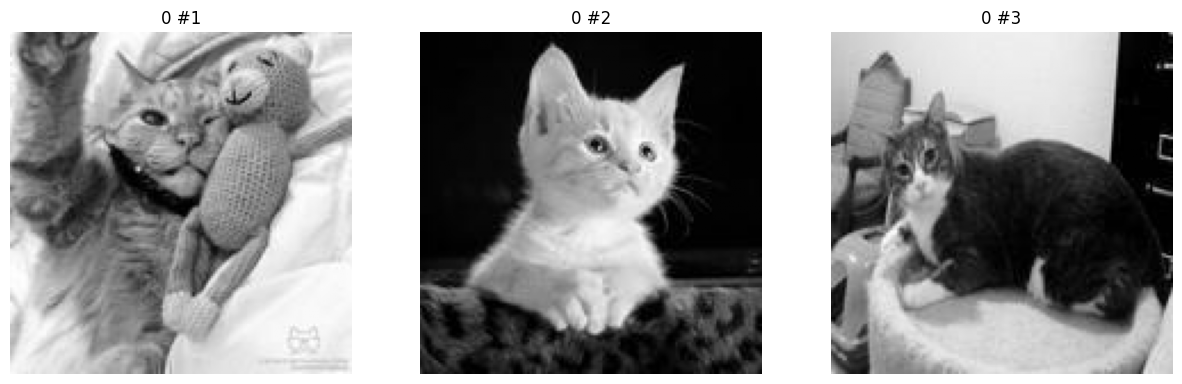

Perros:


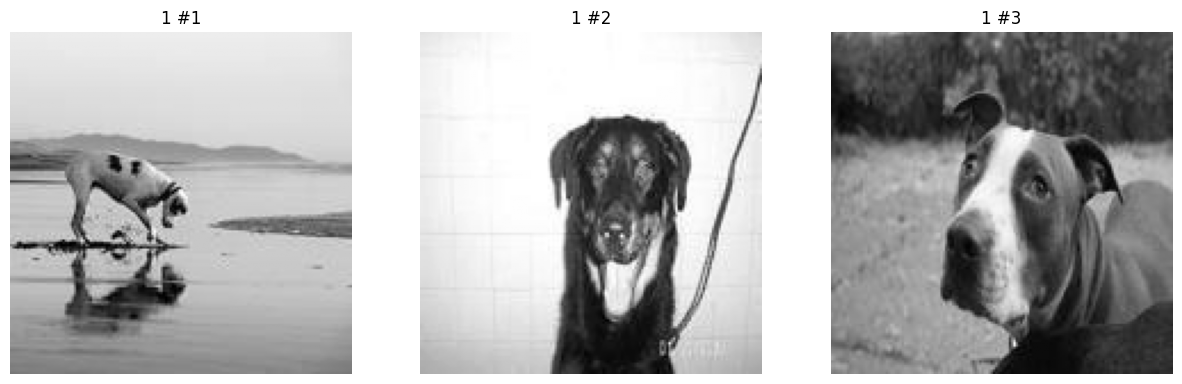

In [7]:
# Función para mostrar imagenes de ejemplo
def display_sample_images(images, labels, category_label, num_images=3):
    plt.figure(figsize=(15, 5))
    category_indices = np.where(labels == category_label)[0]
    for i in range(num_images):
        img_index = category_indices[i]
        img = images[img_index].squeeze()
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'{category_label} #{i + 1}')
        plt.axis('off')
    plt.show()
# Muestra de imagenes de gatos  (category_label = 0 para gatos)
print("Gatos:")
display_sample_images(images, labels, category_label=0)

# Muestra de imagenes de gatos  (category_label = 1 para perros)
print("Perros:")
display_sample_images(images, labels, category_label=1)

## 3. **Elección del Algoritmo**

In [10]:
model = Sequential([
    Input(shape=(150, 150, 1)),     # Definir explícitamente la forma de entrada
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Flatten(),                      # Aplanar los mapas de características 2D a un vector 1D
    Dense(512, activation='relu'),  # Capa totalmente conectada
    Dropout(0.5),                   # Dropout para reducir sobreajuste
    Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 74, 74, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 36, 36, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 17, 17, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,813,313 (25.99 MB)

 Trainable params: 6,812,353 (25.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [13]:
# Seteamos early stopping para que prevenir entrenamientos innecesarios luego de la mejor época
early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenamos nuestro modelo
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=15,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/15
752/752 ━━━━━━━━━━━━━━━━━━━━ 313s 412ms/step - accuracy: 0.6247 - loss: 1.8139 - val_accuracy: 0.7028 - val_loss: 0.5922
Epoch 2/15
752/752 ━━━━━━━━━━━━━━━━━━━━ 309s 411ms/step - accuracy: 0.7699 - loss: 0.4839 - val_accuracy: 0.7066 - val_loss: 0.5848
Epoch 3/15
752/752 ━━━━━━━━━━━━━━━━━━━━ 310s 412ms/step - accuracy: 0.8204 - loss: 0.4009 - val_accuracy: 0.7836 - val_loss: 0.4652
Epoch 4/15
752/752 ━━━━━━━━━━━━━━━━━━━━ 307s 408ms/step - accuracy: 0.8711 - loss: 0.2965 - val_accuracy: 0.7630 - val_loss: 0.5004
Epoch 5/15
752/752 ━━━━━━━━━━━━━━━━━━━━ 302s 402ms/step - accuracy: 0.9077 - loss: 0.2172 - val_accuracy: 0.8106 - val_loss: 0.6096
Epoch 6/15
752/752 ━━━━━━━━━━━━━━━━━━━━ 303s 403ms/step - accuracy: 0.9378 - loss: 0.1540 - val_accuracy: 0.7853 - val_loss: 0.4960


## 5. **Validación del modelo**

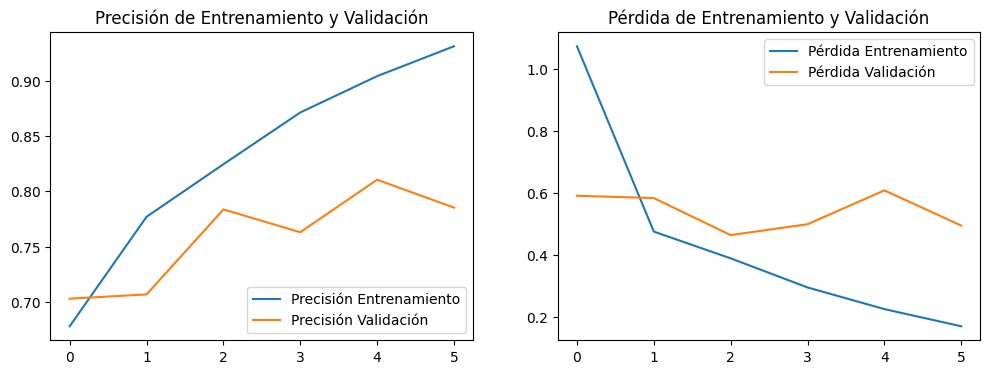

In [16]:
# Graficar precisión (accuracy) y pérdida (loss) de entrenamiento y validación
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Precisión Entrenamiento')
plt.plot(epochs, val_acc, label='Precisión Validación')
plt.legend(loc='lower right')
plt.title('Precisión de Entrenamiento y Validación')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Pérdida Entrenamiento')
plt.plot(epochs, val_loss, label='Pérdida Validación')
plt.legend(loc='upper right')
plt.title('Pérdida de Entrenamiento y Validación')

plt.show()

**Insights**

- El modelo está aprendiendo bien en entrenamiento, y logra alta precisión (> 90%).

- La validación no mejora de forma constante, lo cual puede deberse que este dataset tiene imagenes con mucho ruido ruido lo que puede dificultar el entrenamiento. También puede deberse al sobreajuste.

- El punto óptimo de validación ocurre en la época 5, tanto en accuracy (0.8678) como en loss (0.3266). Hay signos leves de sobreajuste desde la época 6 en adelante.


In [22]:
# Se evalua el modelo en el set de validación
print(f'Validation Accuracy: {history.history["val_accuracy"][-1]}')

# Gererar predicciónes
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Medidas de clasificación
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

Validation Accuracy: 0.8922334909439087
188/188 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step
Accuracy: 0.8922334940961251
Precision: 0.8627813752698119
Recall: 0.9323558813728757
F1 Score: 0.8962203715566944

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89      3012
           1       0.86      0.93      0.90      3001

    accuracy                           0.89      6013
   macro avg       0.89      0.89      0.89      6013
weighted avg       0.89      0.89      0.89      6013



**Insights**

- La clase 0 (gatos) tiene mejor recall (más aciertos al identificar), mientras que la clase 1 (perros) tiene mejor precisión (menos falsos positivos).

- El f1-score está equilibrado entre ambas clases, lo que indica consistencia entre precisión y recall.

- Ambos promedian las macro y weighted avg de ~0.89, lo que muestra que el modelo no está sesgado fuertemente hacia una clase y maneja bien el balance de datos.

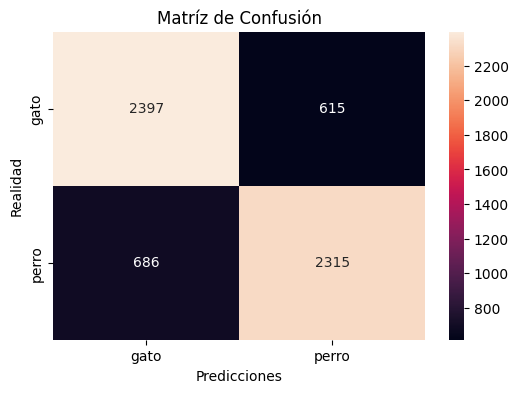

In [19]:
#Graficamos matríz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=['gato', 'perro'], yticklabels=['gato', 'perro'])
plt.ylabel('Realidad')
plt.xlabel('Predicciones')
plt.title('Matríz de Confusión')
plt.show()

**Insights**

- El modelo detecta muy bien los gatos, con muy pocos errores, sin embargo, tiene más dificultad identificando perros, tiende a confundirlos como gatos.

- En el desarollo de este proyecto, aplicaré una técnica de data augmentation para intentar mejorar los resultados y el balance del algoritmo.

## 6. **Implementación y monitoreo**

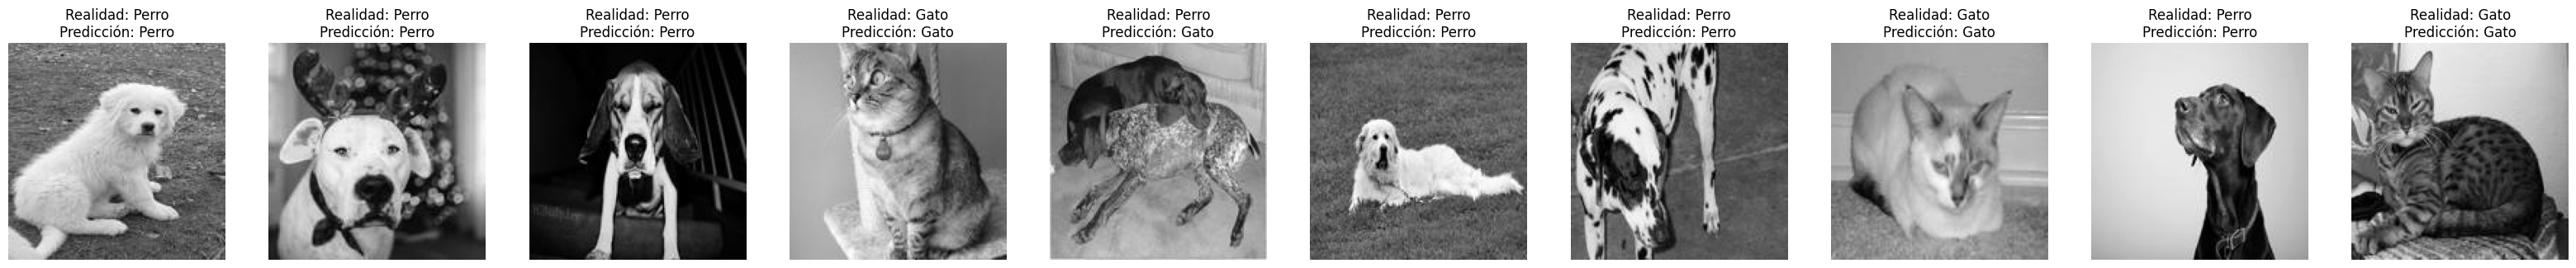

In [24]:
# Función para mostrar imágenes con etiquetas reales y predichas
def mostrar_predicciones(imagenes, etiquetas_reales, etiquetas_predichas, num_imagenes=10):
    plt.figure(figsize=(40, 20))
    indices = np.random.choice(len(imagenes), num_imagenes, replace=False)

    for i, idx in enumerate(indices):
        img = imagenes[idx].squeeze()  # Quitar la dimensión del canal si existe
        etiqueta_real = 'Gato' if etiquetas_reales[idx] == 0 else 'Perro'
        etiqueta_predicha = 'Gato' if etiquetas_predichas[idx] == 0 else 'Perro'

        plt.subplot(1, num_imagenes, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Realidad: {etiqueta_real}\nPredicción: {etiqueta_predicha}')
        plt.axis('off')

    plt.show()

# Mostrar algunas predicciones
mostrar_predicciones(x_test, y_test, y_pred_classes, num_imagenes=10)

Epoch 1/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 339s 452ms/step - accuracy: 0.9089 - loss: 0.2168 - val_accuracy: 0.7993 - val_loss: 0.5208
Epoch 2/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 1.0000 - loss: 0.0941 - val_accuracy: 0.7868 - val_loss: 0.5884
Epoch 3/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 331s 441ms/step - accuracy: 0.9113 - loss: 0.2097 - val_accuracy: 0.9007 - val_loss: 0.2225
Epoch 4/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8438 - loss: 0.3258 - val_accuracy: 0.8951 - val_loss: 0.2293
Epoch 5/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 338s 450ms/step - accuracy: 0.9144 - loss: 0.2014 - val_accuracy: 0.9014 - val_loss: 0.2287
Epoch 6/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9062 - loss: 0.1328 - val_accuracy: 0.9007 - val_loss: 0.2321
Epoch 7/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 332s 442ms/step - accuracy: 0.9163 - loss: 0.1967 - val_accuracy: 0.8716 - val_loss: 0.4845
Epoch 8/10
751/751 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 1.0000 - loss: 0

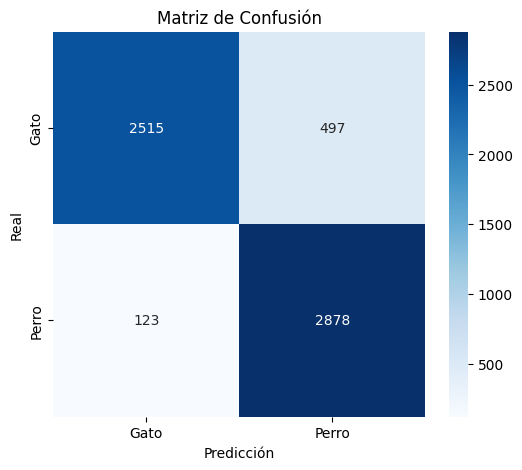

In [30]:
# Aumento de datos (Data Augmentation) para mejorar la generalización del modelo
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# Generador con transformaciones
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Ajustar el generador al conjunto de entrenamiento
datagen.fit(x_train)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

# Entrenar el modelo usando el generador
batch_size = 32

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=10,
    validation_data=(x_test, y_test))

# Evaluación del impacto del data augmentation

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Precisión en prueba: {test_accuracy:.4f}")
print(f"Pérdida en prueba: {test_loss:.4f}")

# Generar predicciones y métricas
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

# Convertir probabilidades a clases (umbral 0.5)
y_pred_probs = model.predict(x_test)
y_pred_classes = (y_pred_probs > 0.5).astype("int32")

# Reporte de clasificación
print(classification_report(y_test, y_pred_classes, target_names=["Gato", "Perro"]))

# Calcular precisión, recall y F1 Score manualmente
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f"Precisión: {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Gato', 'Perro'], yticklabels=['Gato', 'Perro'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

**Insights**
- La técnica de aumento de datos mejoró significativamente la capacidad de generalización del modelo, haciendo que funcione mejor en nuevas imágenes que no fueron vistas durante el entrenamiento.

## **Conclusión**

En este proyecto se desarrolló un modelo de red neuronal convolucional (CNN) capaz de clasificar imágenes de perros y gatos con un desempeño notable. Tras aplicar técnicas de aumento de datos (data augmentation), el modelo alcanzó una precisión del 90%, junto a métricas equilibradas de recall y F1 score, lo que indica una alta capacidad para generalizar sobre datos no vistos.

En cuanto a las preguntas de investigación, se concluye que:

- El modelo CNN supera ampliamente a una clasificación aleatoria (que tendría un rendimiento cercano al 50%), demostrando ser efectivo para identificar patrones visuales complejos.

- El uso de aumento de datos tuvo un impacto positivo en el rendimiento, reduciendo el sobreajuste y mejorando la precisión y estabilidad de las predicciones en el conjunto de prueba.

Estos resultados validan el enfoque utilizado y posicionan al modelo como una solución confiable para tareas básicas de clasificación de imágenes.